# CNOT

In this notebook CNOT gate is introduced.

CNOT is defined as 
- *"flip the target if control is |1>"*, 
- or $target:=control\oplus target$ , 
- or `if control { target := X @ target }`.

Let us derive a matrix for CNOT. 

Truth table is:

```
c t | c T
---------
0 0 | 0 0
0 1 | 0 1
1 0 | 1 1   <---
1 1 | 1 0   <---
```

In [1]:
import numpy as np

ZERO = np.array([1., 0.]).T
ONE = np.array([0., 1.]).T

In [2]:
CNOT = np.zeros((4, 4))

# what's happening here?
CNOT[:, 0b00] = np.kron(ZERO, ZERO)
CNOT[:, 0b01] = np.kron(ZERO, ONE)
CNOT[:, 0b10] = np.kron(ONE, ONE)
CNOT[:, 0b11] = np.kron(ONE, ZERO)

In [3]:
for ic, control in enumerate((ZERO, ONE)):
    for it, target in enumerate((ZERO, ONE)):
        system_state = np.kron(control, target)
        print(f"system |{ic}{it}>: {system_state.T} -> ", end="")
        new_state = CNOT @ system_state
        print(new_state)

system |00>: [1. 0. 0. 0.] -> [1. 0. 0. 0.]
system |01>: [0. 1. 0. 0.] -> [0. 1. 0. 0.]
system |10>: [0. 0. 1. 0.] -> [0. 0. 0. 1.]
system |11>: [0. 0. 0. 1.] -> [0. 0. 1. 0.]


In [4]:
print(CNOT)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


# The most important question
How CNOT acts, if control is in a superposition? This shed some light on the entanglement.

In [5]:
PLUS = (.5 ** .5) * (ZERO + ONE)
MINUS = (.5 ** .5) * (ZERO - ONE)
print("|+> =", PLUS, "; |-> =", MINUS)

|+> = [0.70710678 0.70710678] ; |-> = [ 0.70710678 -0.70710678]


In [6]:
CNOT @ (np.kron(PLUS, ZERO))

array([0.70710678, 0.        , 0.        , 0.70710678])

In [7]:
CNOT @ (np.kron(MINUS, ZERO))

array([ 0.70710678,  0.        ,  0.        , -0.70710678])

In [8]:
for ic, control in enumerate((ZERO, ONE)):
    for it, target in enumerate((ZERO, ONE)):
        
        # <CT| CNOT (|-> ⊗ |0>)
        # or just <CT|CNOT|-0>
        amplitude = np.kron(control, target).T.conj() @ CNOT @ (np.kron(MINUS, ZERO))
        
        # |<CT|CNOT|-0>|
        magnitute = abs(amplitude)
        
        # |<CT|CNOT|-0>|^2
        probability = magnitute ** 2
        print(f"P(|{ic}{it}>) = | <{ic}{it}|CNOT|-0> |^2 = {probability:.3f}")

P(|00>) = | <00|CNOT|-0> |^2 = 0.500
P(|01>) = | <01|CNOT|-0> |^2 = 0.000
P(|10>) = | <10|CNOT|-0> |^2 = 0.000
P(|11>) = | <11|CNOT|-0> |^2 = 0.500


In [9]:
# this is how we measure. Note, that the value on the amplitude 
# correspond to a APRIORI probability, thus, <1.
# APRIORI = P(CONIDITIONAL) * P(CONDITION)
# P(CT) = P(C|T)*P(T)

I_OTIMES_ONE = (np.kron(np.eye(2), ONE.reshape(2, 1)))
I_OTIMES_ONE.T.conj() @ CNOT @ (np.kron(MINUS, ZERO))

array([ 0.        , -0.70710678])

# Can we write the same in qiskit?

In [10]:
from qiskit import BasicAer, execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
backend = BasicAer.get_backend("statevector_simulator")

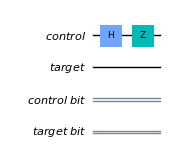

array([ 0.70710678,  0.        , -0.70710678,  0.        ])

In [11]:
control = QuantumRegister(1, "control")
target = QuantumRegister(1, "target")
control_bit = ClassicalRegister(1, "control bit")
target_bit = ClassicalRegister(1, "target bit")

qc = QuantumCircuit(target, control, target_bit, control_bit)

# ok, this should be MINUS \otimes ZERO
qc.h(control)
qc.z(control)
display(qc.draw('mpl', scale=.5, reverse_bits=True))
execute(qc, backend).result().get_statevector().real

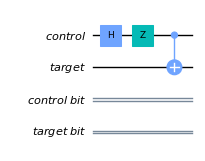

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [12]:
op = qc.cx(control, target)
display(qc.draw('mpl', scale=.5, reverse_bits=True))
# qiskit has a reversed bit ordering
# this is ok, but if you want to see matrices, which match with theory
# you will have to agree, that CX is applied other way :)
print(op[0].operation.to_matrix())

In [13]:
execute(qc, backend).result().get_statevector().real

array([ 0.70710678,  0.        ,  0.        , -0.70710678])

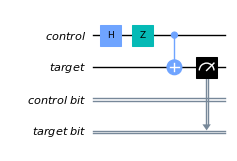

In [14]:
qc.measure(target, target_bit)
display(qc.draw('mpl', scale=.5, reverse_bits=True))

In [15]:
# probabilistic outcome, note, that control is not measured, thus bit = 0
for i in range(10):
    r = execute(qc, backend).result()
    print("C =", r.get_statevector().real, " \tT= ", r.get_counts())

C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [1. 0. 0. 0.]  	T=  {'0 0': 1}
C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [1. 0. 0. 0.]  	T=  {'0 0': 1}
C = [ 0.  0.  0. -1.]  	T=  {'0 1': 1}
C = [1. 0. 0. 0.]  	T=  {'0 0': 1}


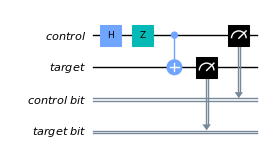

In [16]:
qc.measure(control, control_bit)
display(qc.draw('mpl', scale=.5, reverse_bits=True))

In [17]:
# probabilistic outcome
for i in range(10):
    r = execute(qc, backend).result()
    print(r.get_statevector().real, "  \t", r.get_counts())

[1. 0. 0. 0.]   	 {'0 0': 1}
[1. 0. 0. 0.]   	 {'0 0': 1}
[ 0.  0.  0. -1.]   	 {'1 1': 1}
[1. 0. 0. 0.]   	 {'0 0': 1}
[1. 0. 0. 0.]   	 {'0 0': 1}
[ 0.  0.  0. -1.]   	 {'1 1': 1}
[ 0.  0.  0. -1.]   	 {'1 1': 1}
[1. 0. 0. 0.]   	 {'0 0': 1}
[1. 0. 0. 0.]   	 {'0 0': 1}
[1. 0. 0. 0.]   	 {'0 0': 1}
